# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import pandas as pd
from dotenv import load_dotenv
import os
from newsapi import NewsApiClient

import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\savag\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv("example.env")
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch all the news about Facebook Libra
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin", language="en", sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Bitcoin: {bitcoin_headlines['totalResults']}")

bitcoin_headlines["articles"][0]

Total articles about Bitcoin: 3913


{'source': {'id': None, 'name': 'Gizmodo.com'},
 'author': 'John Biggs',
 'title': 'Crypto Traders Cut Out the Middleman, Simply Rob Victim',
 'description': 'Two alleged crypto traders in Singapore apparently came up with a fool-proof plan: rather than convert a customer’s 365,000 Singapore dollars to bitcoin, they would simply rob the victim when he came in to do the trade.Read more...',
 'url': 'https://gizmodo.com/crypto-traders-cut-out-the-middleman-simply-rob-victim-1845011301',
 'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/li0fkkejdmaugm8v1fkw.jpg',
 'publishedAt': '2020-09-10T14:28:00Z',
 'content': 'Two alleged crypto traders in Singapore apparently came up with a fool-proof plan: rather than convert a customers 365,000 Singapore dollars to bitcoin, they would simply rob the victim when he came … [+1735 chars]'}

In [5]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="ethereum", language="en", sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Ethereum: {ethereum_headlines['totalResults']}")

ethereum_headlines["articles"][0]

Total articles about Ethereum: 1379


{'source': {'id': 'mashable', 'name': 'Mashable'},
 'author': 'Stan Schroeder',
 'title': 'Crypto wallet MetaMask finally launches on iOS and Android, and it supports Apple Pay',
 'description': "If you've interacted with cryptocurrencies in the past couple of years, there's a good chance you've used MetaMask. It's a cryptocurrency wallet in the form of a browser extension that supports Ethereum and its ecosystem, making it easy to connect with a dece…",
 'url': 'https://mashable.com/article/metamask-ios-android/',
 'urlToImage': 'https://mondrian.mashable.com/2020%252F09%252F02%252Ffd%252Fe724b5edb4b644dba45958e17ad591e1.6b9c6.png%252F1200x630.png?signature=xIKBM112GVhTA9mUq0DRjCVGWSE=',
 'publishedAt': '2020-09-02T16:00:00Z',
 'content': "If you've interacted with cryptocurrencies in the past couple of years, there's a good chance you've used MetaMask. It's a cryptocurrency wallet in the form of a browser extension that supports Ether… [+2291 chars]"}

In [6]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({"text": text, "date": date, "compound": compound, "positive": pos, "neutral": neu, "negative": neg})
    except AttributeError:
        pass
    
# Create Dataframe
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
columns = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df = bitcoin_df[columns]
bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2020-09-10,Two alleged crypto traders in Singapore appare...,-0.6908,0.000,0.16,0.840
1,2020-09-08,"By Alexis Akwagyiram, Tom Wilson\r\n* Monthly ...",0.0000,0.000,0.00,1.000
2,2020-08-23,“The COVID-19 pandemic has resulted in a mass ...,0.2732,0.063,0.00,0.937
3,2020-09-08,"LAGOS/LONDON (Reuters) - Four months ago, Abol...",0.0000,0.000,0.00,1.000
4,2020-09-08,"LAGOS/LONDON (Reuters) - Four months ago, Abol...",0.0000,0.000,0.00,1.000


In [7]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({"text": text, "date": date, "compound": compound, "positive": pos, "neutral": neu, "negative": neg})
    except AttributeError:
        pass
    
# Create Dataframe
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
columns = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df = ethereum_df[columns]
ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2020-09-02,If you've interacted with cryptocurrencies in ...,0.7506,0.209,0.0,0.791
1,2020-09-07,TL;DR: The Complete Stock and Cryptocurrency I...,0.0000,0.000,0.0,1.000
2,2020-08-17,TL;DR: The Mega Blockchain Mastery Bundle is o...,0.0000,0.000,0.0,1.000
3,2020-08-26,LONDON (Reuters) - It sounds like a surefire b...,0.7579,0.181,0.0,0.819
4,2020-08-25,NEW YORK (Reuters) - Brooklyn-based technology...,0.0000,0.000,0.0,1.000


In [8]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.365290,0.075000,0.008000,0.917000
std,0.319038,0.046302,0.035777,0.046484
min,-0.690800,0.000000,0.000000,0.802000
25%,0.354650,0.067500,0.000000,0.910000
50%,0.507000,0.090000,0.000000,0.910000
75%,0.507000,0.090000,0.000000,0.915250
max,0.750600,0.198000,0.160000,1.000000


In [9]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,compound,positive,negative,neutral
count,17.000000,17.000000,17.000000,17.000000
mean,0.156718,0.066118,0.027588,0.906353
std,0.350926,0.065045,0.057046,0.092206
min,-0.599400,0.000000,0.000000,0.732000
25%,0.000000,0.000000,0.000000,0.841000
50%,0.000000,0.062000,0.000000,0.924000
75%,0.401900,0.093000,0.000000,1.000000
max,0.757900,0.209000,0.189000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had the highest mean postive score between the two coins at 0.075

Q: Which coin had the highest compound score?

A: Ethereum had the highest compound score, with a max score of 0.7579 

Q. Which coin had the highest positive score?

A: Ethereum also had the highest postive score, with a max positive score of 0.209

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [61]:
# Expand the default stopwords list if necessary
sw_additions = ["char", "chars"]

In [62]:
lemmatizer = WordNetLemmatizer()

# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    # Remove the stop words and convert words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_additions)]

    return tokens

In [63]:
# Create a new tokens column for Bitcoin
bitcoin_df["tokens"] = bitcoin_df["text"].apply(tokenizer)
bitcoin_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2020-09-10,Two alleged crypto traders in Singapore appare...,-0.6908,0.000,0.16,0.840,"[two, alleged, crypto, trader, singapore, appa..."
1,2020-09-08,"By Alexis Akwagyiram, Tom Wilson\r\n* Monthly ...",0.0000,0.000,0.00,1.000,"[alexis, akwagyiram, tom, wilson, monthly, cry..."
2,2020-08-23,“The COVID-19 pandemic has resulted in a mass ...,0.2732,0.063,0.00,0.937,"[covid, pandemic, ha, resulted, mass, shift, w..."
3,2020-09-08,"LAGOS/LONDON (Reuters) - Four months ago, Abol...",0.0000,0.000,0.00,1.000,"[lagoslondon, reuters, four, month, ago, abola..."
4,2020-09-08,"LAGOS/LONDON (Reuters) - Four months ago, Abol...",0.0000,0.000,0.00,1.000,"[lagoslondon, reuters, four, month, ago, abola..."


In [64]:
# Create a new tokens column for Ethereum
ethereum_df["tokens"] = ethereum_df["text"].apply(tokenizer)
ethereum_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2020-09-02,If you've interacted with cryptocurrencies in ...,0.7506,0.209,0.0,0.791,"[youve, interacted, cryptocurrencies, past, co..."
1,2020-09-07,TL;DR: The Complete Stock and Cryptocurrency I...,0.0000,0.000,0.0,1.000,"[tldr, complete, stock, cryptocurrency, invest..."
2,2020-08-17,TL;DR: The Mega Blockchain Mastery Bundle is o...,0.0000,0.000,0.0,1.000,"[tldr, mega, blockchain, mastery, bundle, sale..."
3,2020-08-26,LONDON (Reuters) - It sounds like a surefire b...,0.7579,0.181,0.0,0.819,"[london, reuters, sound, like, surefire, bet, ..."
4,2020-08-25,NEW YORK (Reuters) - Brooklyn-based technology...,0.0000,0.000,0.0,1.000,"[new, york, reuters, brooklynbased, technology..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [65]:
from collections import Counter
from nltk import ngrams

In [66]:
# Generate the Bitcoin N-grams where N=2
bitcoin_word_list = bitcoin_df["tokens"].to_list()

# Convert tokens to one giant string
bitcoin_big_string = []
for items in bitcoin_word_list:
    for item in items:
        bitcoin_big_string += [item] 

# Retrieve Word Counts
bitcoin_word_counts = Counter(bitcoin_big_string)
#print(dict(word_counts))

# N-gram Counts
bigram_counts = Counter(ngrams(bitcoin_big_string, n=2))
print(dict(bigram_counts))

{('two', 'alleged'): 1, ('alleged', 'crypto'): 1, ('crypto', 'trader'): 1, ('trader', 'singapore'): 1, ('singapore', 'apparently'): 1, ('apparently', 'came'): 1, ('came', 'foolproof'): 1, ('foolproof', 'plan'): 1, ('plan', 'rather'): 1, ('rather', 'convert'): 1, ('convert', 'customer'): 1, ('customer', 'singapore'): 1, ('singapore', 'dollar'): 1, ('dollar', 'bitcoin'): 1, ('bitcoin', 'would'): 1, ('would', 'simply'): 1, ('simply', 'rob'): 1, ('rob', 'victim'): 1, ('victim', 'came'): 1, ('came', 'alexis'): 1, ('alexis', 'akwagyiram'): 1, ('akwagyiram', 'tom'): 1, ('tom', 'wilson'): 1, ('wilson', 'monthly'): 1, ('monthly', 'crypto'): 1, ('crypto', 'transfer'): 1, ('transfer', 'africa'): 1, ('africa', 'rise'): 1, ('rise', 'year'): 1, ('year', 'much'): 1, ('much', 'activity'): 1, ('activity', 'nigeria'): 1, ('nigeria', 'south'): 1, ('south', 'africa'): 1, ('africa', 'kenya'): 1, ('kenya', 'driven'): 1, ('driven', 'small'): 1, ('small', 'business'): 1, ('business', 'migrant'): 1, ('migrant'

In [67]:
# Generate the Ethereum N-grams where N=2
ethereum_word_list = ethereum_df["tokens"].to_list()

# Convert tokens to one giant string
ethereum_big_string = []
for items in ethereum_word_list:
    for item in items:
        ethereum_big_string += [item] 

# Retrieve Word Counts
ethereum_word_counts = Counter(ethereum_big_string)
#print(dict(ethereum_word_counts))

# N-gram Counts
ethereum_bigram_counts = Counter(ngrams(ethereum_big_string, n=2))
print(dict(ethereum_bigram_counts))

{('youve', 'interacted'): 1, ('interacted', 'cryptocurrencies'): 1, ('cryptocurrencies', 'past'): 1, ('past', 'couple'): 1, ('couple', 'year'): 1, ('year', 'good'): 1, ('good', 'chance'): 1, ('chance', 'youve'): 1, ('youve', 'used'): 1, ('used', 'metamask'): 1, ('metamask', 'cryptocurrency'): 1, ('cryptocurrency', 'wallet'): 1, ('wallet', 'form'): 1, ('form', 'browser'): 1, ('browser', 'extension'): 1, ('extension', 'support'): 1, ('support', 'ether'): 1, ('ether', 'tldr'): 1, ('tldr', 'complete'): 1, ('complete', 'stock'): 1, ('stock', 'cryptocurrency'): 1, ('cryptocurrency', 'investment'): 1, ('investment', 'toolkit'): 1, ('toolkit', 'bundle'): 1, ('bundle', 'sale'): 2, ('sale', 'sept'): 1, ('sept', 'saving'): 1, ('saving', 'list'): 2, ('list', 'pricethe'): 1, ('pricethe', 'world'): 1, ('world', 'finance'): 1, ('finance', 'ha'): 1, ('ha', 'always'): 1, ('always', 'complicated'): 1, ('complicated', 'th'): 1, ('th', 'tldr'): 2, ('tldr', 'mega'): 1, ('mega', 'blockchain'): 1, ('blockcha

In [68]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [69]:
# Get the top 10 words for Bitcoin
print(dict(token_count(bitcoin_word_counts)))

{'bitcoin': 41, 'satoshi': 26, 'nakaboto': 26, 'robot': 13, 'colleague': 13, 'writes': 13, 'every': 13, 'fucking': 13, 'daywelcome': 13, 'another': 13}


In [70]:
# Get the top 10 words for Ethereum
print(dict(token_count(ethereum_word_counts)))

{'bitcoin': 10, 'ethereum': 7, 'cryptocurrency': 5, 'price': 4, 'youve': 3, 'tldr': 3, 'bundle': 3, 'ha': 3, 'could': 3, 'btc': 3}


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [71]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

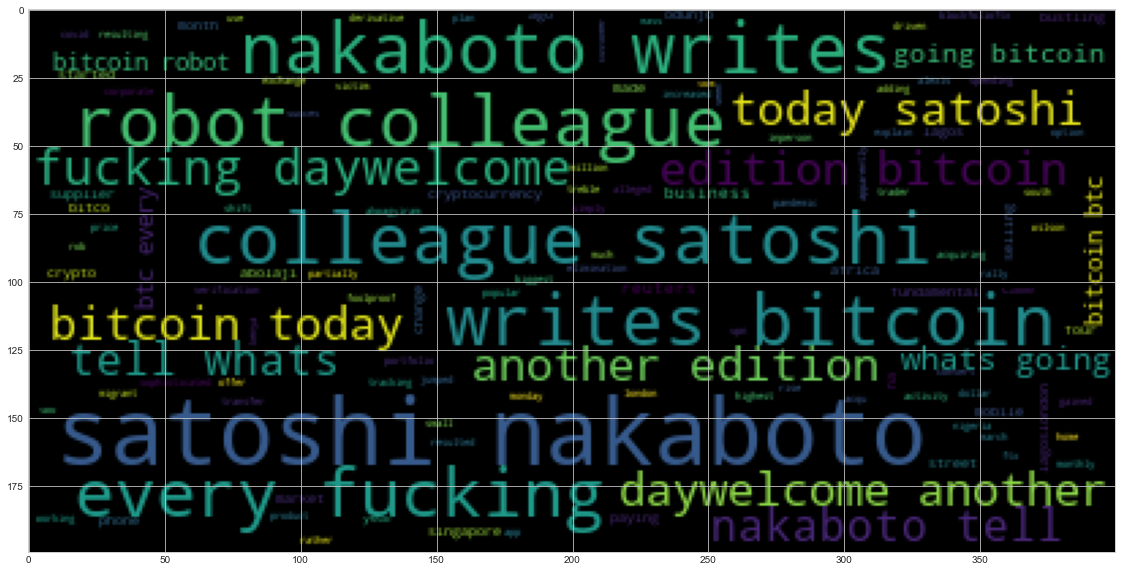

In [72]:
# Generate the Bitcoin word cloud
btc_string = ' '.join(bitcoin_big_string)
btc_wc = WordCloud().generate(btc_string)
plt.imshow(btc_wc)


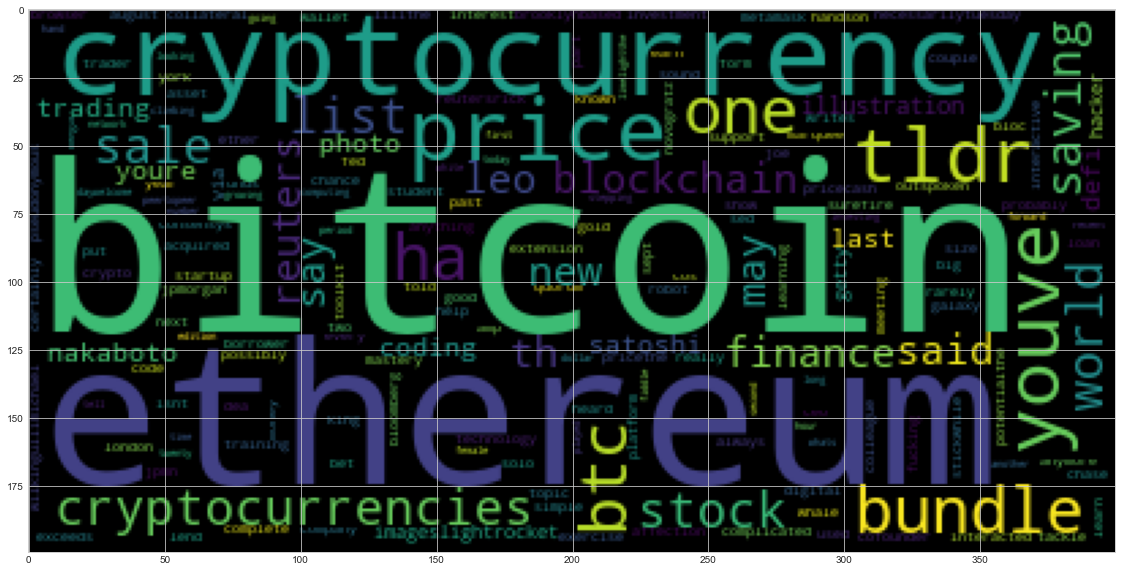

In [73]:
# Generate the Ethereum word cloud
eth_string = ' '.join(ethereum_big_string)
eth_wc = WordCloud().generate(eth_string)
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [74]:
import spacy
from spacy import displacy

In [75]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [76]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [79]:
# Clean text function
def clean_text(text):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    return re_clean

# Concatenate all of the Bitcoin text together
bitcoin_text_list = bitcoin_df["text"].to_list()
btc_text_string = ' '.join(bitcoin_text_list)
btc_article = clean_text(btc_text_string)
btc_article

'Two alleged crypto traders in Singapore apparently came up with a foolproof plan rather than convert a customers  Singapore dollars to bitcoin they would simply rob the victim when he came   chars By Alexis Akwagyiram Tom Wilson Monthly crypto transfers to and from Africa rise  in a year Much of the activity in Nigeria South Africa and Kenya Driven by small businesses and migrant  chars The COVID pandemic has resulted in a mass shift to working from home resulting in increased use of corporate VPN and elimination of inperson verification which can partially explain the succes  chars LAGOSLONDON Reuters  Four months ago Abolaji Odunjo made a fundamental change to his business selling mobile phones in a bustling street market in Lagos He started paying his suppliers in bitco  chars LAGOSLONDON Reuters  Four months ago Abolaji Odunjo made a fundamental change to his business selling mobile phones in a bustling street market in Lagos He started paying his suppliers in bitco  chars LONDON 

In [84]:
# Run the NER processor on all of the text
doc = nlp(btc_article)
doc
# Add a title to the document
# YOUR CODE HERE!

Two alleged crypto traders in Singapore apparently came up with a foolproof plan rather than convert a customers  Singapore dollars to bitcoin they would simply rob the victim when he came   chars By Alexis Akwagyiram Tom Wilson Monthly crypto transfers to and from Africa rise  in a year Much of the activity in Nigeria South Africa and Kenya Driven by small businesses and migrant  chars The COVID pandemic has resulted in a mass shift to working from home resulting in increased use of corporate VPN and elimination of inperson verification which can partially explain the succes  chars LAGOSLONDON Reuters  Four months ago Abolaji Odunjo made a fundamental change to his business selling mobile phones in a bustling street market in Lagos He started paying his suppliers in bitco  chars LAGOSLONDON Reuters  Four months ago Abolaji Odunjo made a fundamental change to his business selling mobile phones in a bustling street market in Lagos He started paying his suppliers in bitco  chars LONDON R

In [85]:
# Render the visualization
displacy.render(doc, style='ent')

In [82]:
# List all Entities
doc.ents

(Two,
 Singapore,
 Singapore,
 Alexis Akwagyiram Tom Wilson,
 Monthly,
 Africa,
 a year,
 Nigeria South Africa,
 Kenya Driven,
 COVID,
 VPN,
 LAGOSLONDON Reuters,
 Four months ago,
 Abolaji Odunjo,
 Lagos,
 Reuters,
 Four months ago,
 Abolaji Odunjo,
 Lagos,
 LONDON,
 Reuters,
 Bitcoin,
 over a year,
 Monday,
 March,
 Satoshi Nakaboto,
 Bitcoin,
 Bitcoin,
 Today,
 Satoshi Nakaboto,
 Bitcoin,
 Satoshi Nakaboto,
 Bitcoin,
 Bitcoin,
 Today,
 Satoshi Nakaboto,
 Bitcoin,
 Satoshi Nakaboto,
 Bitcoin,
 dayWelcome,
 Bitcoin,
 Today,
 Satoshi Nakaboto,
 Bitcoin,
 Satoshi Nakaboto,
 Bitcoin,
 dayWelcome,
 Bitcoin,
 Today,
 Satoshi Nakaboto,
 Bitcoin,
 Satoshi Nakaboto,
 Bitcoin,
 dayWelcome,
 Bitcoin,
 Today,
 Satoshi Nakaboto,
 Bitcoin,
 Satoshi Nakaboto,
 Bitcoin,
 Bitcoin,
 Today,
 Satoshi Nakaboto,
 Bitcoin,
 Satoshi Nakaboto,
 Bitcoin,
 Bitcoin,
 Today,
 Satoshi Nakaboto,
 Bitcoin,
 Satoshi Nakaboto,
 Bitcoin,
 Bitcoin,
 Today,
 Satoshi Nakaboto,
 Bitcoin,
 Satoshi Nakaboto,
 Bitcoin,
 Bitc

---

### Ethereum NER

In [83]:
# Concatenate all of the Ethereum text together
ethereum_text_list = ethereum_df["text"].to_list()
eth_text_string = ' '.join(ethereum_text_list)
eth_article = clean_text(eth_text_string)
eth_article

'If youve interacted with cryptocurrencies in the past couple of years theres a good chance youve used MetaMask Its a cryptocurrency wallet in the form of a browser extension that supports Ether  chars TLDR The Complete Stock and Cryptocurrency Investment Toolkit Bundle is on sale for  as of Sept  saving you  on list priceThe world of finance has always been complicated and now th  chars TLDR The Mega Blockchain Mastery Bundle is on sale for  as of August  saving you  on list priceCash isnt necessarily king anymore Youve probably heard that cryptocurrency and bloc  chars LONDON Reuters  It sounds like a surefire bet You lend money to a borrower who puts up collateral that exceeds the size of the loan and then you earn interest of about  What could possibly g  chars NEW YORK Reuters  Brooklynbased technology startup ConsenSys has acquired JPMorgan Chase amp Cos JPMN marquee blockchain platform Quorum the companies said on Tuesday As part of the dea  chars An outspoken Bitcoin whale who 

In [86]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_article)
eth_doc

# Add a title to the document
# YOUR CODE HERE!

If youve interacted with cryptocurrencies in the past couple of years theres a good chance youve used MetaMask Its a cryptocurrency wallet in the form of a browser extension that supports Ether  chars TLDR The Complete Stock and Cryptocurrency Investment Toolkit Bundle is on sale for  as of Sept  saving you  on list priceThe world of finance has always been complicated and now th  chars TLDR The Mega Blockchain Mastery Bundle is on sale for  as of August  saving you  on list priceCash isnt necessarily king anymore Youve probably heard that cryptocurrency and bloc  chars LONDON Reuters  It sounds like a surefire bet You lend money to a borrower who puts up collateral that exceeds the size of the loan and then you earn interest of about  What could possibly g  chars NEW YORK Reuters  Brooklynbased technology startup ConsenSys has acquired JPMorgan Chase amp Cos JPMN marquee blockchain platform Quorum the companies said on Tuesday As part of the dea  chars An outspoken Bitcoin whale who r

In [87]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [90]:
# List all Entities
eth_doc.ents

(the past couple of years,
 August,
 LONDON,
 Reuters,
 ConsenSys,
 JPMorgan Chase,
 Quorum,
 Tuesday,
 Bitcoin,
 BTC,
 two,
 potentialThe,
 Joe,
 UNUS SED LEO LEO,
 WilkingulliMichael Novogratz,
 Bloomberg,
 liliThe Galaxy Digital,
 Fed,
 TLDR,
 Satoshi Nakaboto,
 Bitcoin,
 Bitcoin,
 Today,
 Satoshi Nakaboto,
 Bitcoin,
 first,
 second,
 one,
 the last hour,
 twenty dollars,
 May Ethereum,
 bitcoin,
 DeFi,
 DeFi,
 POLAND,
 Getty,
 Imag,
 Bitcoin,
 Getty ImagesThe,
 Bitcoin,
 ETH,
 Last week,
 YouTube,
 Bitcoin,
 Bitcoin,
 BTC,
 Monday,
 SampP)

---